## Assignment 3
<p>May 2018 </p>
<p>Long Thanh NGUYEN </p>
<p>long.nguyen2017@qcf.jvn.edu.vn </p>


In [1]:
!pip install sobol_seq

# Question 
We consider the problem of pricing an option with payoff $ϕ(S_T)$ where the underlying asset S follows the dynamics (under $\mathbb{Q}$):
\begin{equation}
\frac{dS_t}{S_t} = rdt + \sigma dW_t 
\end{equation}

<p>where the risk-free rate and the volatility coefficient are all deterministic. </p>
For all numerical applications in this assignment we take
<div style="text-align: center"> x = 100, r = 0.2, σ = 0.1, T = 1.</div>

### Question 1
Justify with a short argument why the price of such an option when $S_t = x$ is given by
\begin{equation}
u(t,x) = e^{−r(T−t)}\mathbb{E}^\mathbb{Q}\big[ϕ(S_T)\mid S_t=x\big].
\end{equation}

**Answer:**

We got following parameters:
* $e^{−r(T−t)}$: is the discounted factor for the period time t to T
* $\mathbb{E}^\mathbb{Q}\big[ϕ(S_T)\mid S_t=x\big]$: is the expectation as it is the price option function under the dynamics $\mathbb{Q}$. The expectation of payoff function $ϕ(S_T)$ with condition at $S_t=x$

### Question 2
Suppose we are able to simulate n values of $S_T,\left\{S^{(1)}_T,...,S^{(n)}_T\right\}$, cite the theorem allowing us to approximate the price of this option by

\begin{equation}
u(t,x) \approx u^{MC}(t,x) := e^{−r(T−t)}\frac{\sum_{i=1}^{n}\phi(S^{(i)}_T)}{n}
\end{equation}

Give an estimation of the expected value and the standard-deviation of $u^{MC}(t,x)$ from those of $ϕ(S_T)$. Provide the 95%-confﬁdence interval of the estimated price.

**Answer:**

### Question 3
We consider the simulation of $S_T$ given $S_t=x$, show (with help of Ito’s lemma) that
\begin{equation}
S_T = S_t e^{(r−σ^2/2)(T−t)+σ(W_T−W_t)}.
\end{equation}
Using the property of the standard Brownian motion, describe how to simulate $S_T$ from a random normal distribution.

**Answer:**

We got Ito process as follow:
\begin{equation}
dx=a(x,t)dt + b(x,t)dW_t
\end{equation}
Consequence we got $G=G(x,t)$:
\begin{equation}
dG = \Big(\frac{\partial G}{\partial x}a + \frac{\partial G}{\partial t} + \frac{1}{2}\frac{\partial^2 G}{\partial x^2}b^2\Big)dt + \frac{\partial G}{\partial x}bdW_t
\end{equation}
Let $x = S_t, a = rx = rS_t, b = \sigma x = \sigma S_t, G = ln(x) = ln(S_t)$

\begin{equation}
\implies
\begin{cases}
    \frac{\partial G}{\partial x} = \frac{\partial ln(S_t)}{\partial S_t} = \frac{1}{S_t} \Rightarrow \frac{\partial^2 G}{\partial x^2} = -\frac{1}{S^{2}_{t}} \\
    \frac{\partial G}{\partial t} = \frac{\partial ln(S_t)}{\partial t} = 0 \\
\end{cases}
\end{equation}
Then 
\begin{equation}
dG = dln(S_t) = \Big(\frac{1}{S_t}rS_t + 0 - \frac{1}{2}\frac{1}{S^{2}_{t}}\sigma^2S^{2}_{t} \Big)dt + \frac{1}{S_t}\sigma S_tdW_t 
\end{equation}

\begin{equation}
\Leftrightarrow dln(S_t) = (r - \frac{\sigma^2}{2})dt + \sigma dW_t
\end{equation}

\begin{equation}
\Rightarrow \int_t^T {dln(S_k)} = \int_t^T{(r - \frac{\sigma^2}{2})dk} + \int_t^T{\sigma dW_k} \\
\Leftrightarrow \int_t^T {dln(S_k)} = (r - \frac{\sigma^2}{2})\int_t^T{dk} + \sigma \int_t^T{dW_k} \\
\Rightarrow ln\frac{S_T}{S_t} = (r - \frac{\sigma^2}{2})(T - t) + \sigma (W_T - W_t)
\end{equation}
\begin{equation}
\Leftrightarrow S_T = S_t e^{(r−σ^2/2)(T−t)+σ(W_T−W_t)}.
\end{equation}

Simulate $S_T$ as a random normal distribution:
* We got all the input: $r = 0.2, \sigma = 0.1, T = 1, S_t = x = 100, t$
* Generate $(W_T-W_t) \sim \mathscr{N}(0,T-t)$
* Run $S_T = S_t e^{(r−σ^2/2)(T−t)+σ(W_T−W_t)}$

### Question 4
In the previous question we directly simulate the normal distribution, show that if we only have the uniform $[0,1]$ distribution, we would have
\begin{equation}
Z = \mathcal{N}^{−1}(U) \sim N(0,1), U \sim \mathscr{U}(0, 1),
\end{equation}
where $\mathcal{N}^{−1}$ is the inverse of the standard normal distribution C.D.F.

**Answer:**

We got
\begin{equation}
\begin{cases}
    U \sim \mathscr{U}(0, 1) \\
    Z = \mathcal{N}^{−1}(U) \sim N(0,1) \text{ (standard normal C.D.F)}
\end{cases} \\
\end{equation}

\begin{equation}
\Rightarrow F_z(z) = P(Z\leq z) = P\Big(\mathcal{N}^{−1}(U) \leq z\Big) = P\Big(U \leq \mathcal{N}(z)\Big) = \mathcal{N}(z)
\end{equation}
So we can simulate the normal distribution from Uniform Distribution

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import sobol_seq as sb
import pylab as pl

### Question 5
Instead of simulate the true uniform variable, one is able also to use a low discrepancy sequence, for instance, the Sobol sequence - [see this link]( https://github.com/naught101/sobol_seq). Apply the previous method to generate n values (n ∈ {1000,10000,100000}) for the normal distribution, verify indeed that when n becomes large the distribution of generated values converge to the standard normal distribution.

**Answer:**

In [3]:
#generate Uniform distribution by Sobol
U=sb.i4_sobol_generate(2, 1000)
UU=sb.i4_sobol_generate(2, 10000)
UUU=sb.i4_sobol_generate(2, 100000)

In [4]:
#Simulate Normal Distribution from sobol list
N=np.sqrt(-2*np.log(U[:,0]))* np.cos(2*np.pi*U[:,1])
NN=np.sqrt(-2*np.log(UU[:,0]))* np.cos(2*np.pi*UU[:,1])
NNN=np.sqrt(-2*np.log(UUU[:,0]))* np.cos(2*np.pi*UUU[:,1])

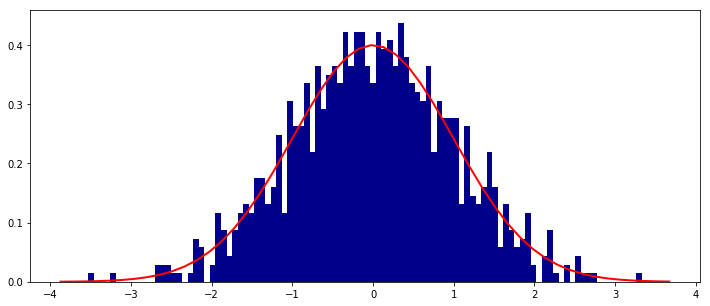

In [5]:
#plot the new Normal Distribution
plt.figure(figsize = (12,5))
plt.hist(N,bins=100, normed=True, color='darkblue')
mu, std = stats.norm.fit(N)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'red', linewidth=2)
plt.show()

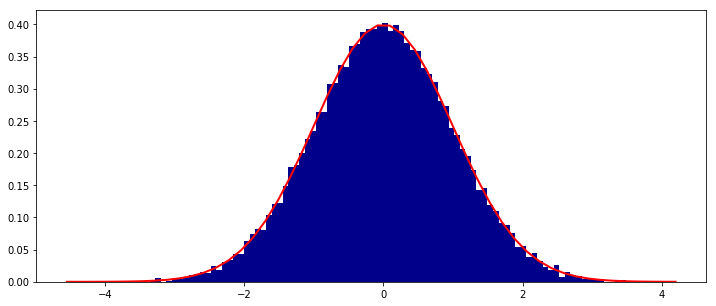

In [6]:
#plot the new Normal Distribution
plt.figure(figsize = (12,5))
plt.hist(NN,bins=100, normed=True, color='darkblue')
mu, std = stats.norm.fit(N)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'red', linewidth=2)
plt.show()

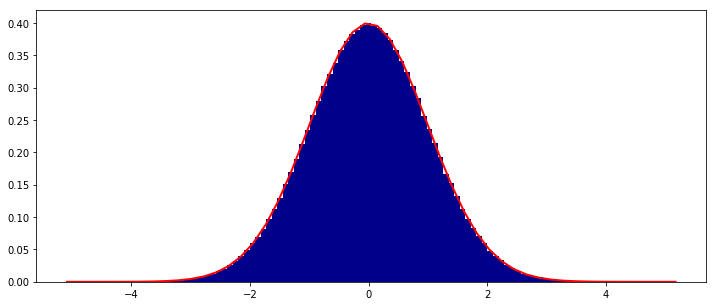

In [7]:
#plot the new Normal Distribution
plt.figure(figsize = (12,5))
plt.hist(NNN,bins=100, normed=True, color='darkblue')
mu, std = stats.norm.fit(N)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'red', linewidth=2)
plt.show()

**Conclusion**
When n becomes larger and larger, the distribution of generated values converge to the standard normal distribution

### Question 6
For the purpose of hedging, we also need (among many greeks) the delta, i.e., ∆ = $\frac{∂u}{∂x}$. Provide two schemes to approximate ∆(t,x) from u(t,x), u(t,x±ε)

**Answer:**

We got Taylor Expansion:
\begin{equation}
f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + ...
\end{equation}
Let the payoff function as u(t,x) with fixed t, then
\begin{equation}
\Delta u(t,x) = \frac{∂u}{∂x} 
\end{equation}
Apply $u(t,x+\varepsilon)$ to Taylor Expansion:
\begin{equation}
u(t,x+\varepsilon) = u(t,x) + \frac{\partial u(t,x)}{1!}(x+\varepsilon-x) + \frac{\partial^2 u(t,x)}{2!}(x+\varepsilon-x)^2 + ... = u(t,x) + \frac{\partial u(t,x)}{1!}\varepsilon + \frac{\partial^2 u(t,x)}{2!}\varepsilon^2 + ... \\
\Leftrightarrow u(t,x+\varepsilon) \approx u(t,x) + \frac{\partial u(t,x)}{1!} \text{ (as we approximate the rest of the expansion, } \varepsilon \to \infty \text {)}
\end{equation}
Then
\begin{equation}
\Delta u(t,x) = u(t,x) - u(t,x+\varepsilon) = u(t,x) - u(t,x) - \frac{\partial u(t,x)}{1!} = -\frac{∂u}{∂x} = \frac{u(t,x+\varepsilon)-u(t,x)}{(x+\varepsilon - x)} = \frac{u(t,x+\varepsilon)-u(t,x)}{\varepsilon}
\end{equation}
we got: 
\begin{equation}
\Delta u(t,x) \approx \frac{u(t,x+\varepsilon)-u(t,x)}{\varepsilon}
\end{equation}

Similarly, we apply $u(t,x-\varepsilon)$ to Taylor Expansion:
\begin{equation}
u(t,x-\varepsilon) \approx u(t,x) + \frac{\partial u(t,x)}{1!}(x- \varepsilon -x) \approx u(t,x) - \frac{\partial u(t,x)}{1!} (\varepsilon \to \infty )
\end{equation}
Then, the $u(t,x) - u(t,x-\varepsilon)$
\begin{equation}
\Delta u(t,x) = u(t,x) - u(t,x-\varepsilon) = u(t,x) - u(t,x) + \frac{\partial u(t,x)}{1!} = \frac{∂u}{∂x} = \frac{u(t,x)-u(t,x-\varepsilon)}{(x-\varepsilon - x)} = \frac{u(t,x)-u(t,x-\varepsilon)}{\varepsilon}
\end{equation}

In short, we got scheme 1 as: 
\begin{equation}
\Delta u(t,x) \approx
\begin{cases}
    \frac{u(t,x+\varepsilon)-u(t,x)}{\varepsilon} \\
    \frac{u(t,x)-u(t,x-\varepsilon)}{\varepsilon}
\end{cases} \\
\end{equation}

Similarly, the scheme 2 would be:
\begin{equation}
\Delta u(t,x) \approx \frac{u(t,x+\varepsilon)-u(t,x-\varepsilon)}{(x+\varepsilon - x+\varepsilon)} = \frac{u(t,x+\varepsilon)-u(t,x-\varepsilon)}{2\varepsilon}
\end{equation}

### Question 7
When we approximate $u(t,x \pm \varepsilon)$, we can either simulate new random values or reuse the same random values as when we approximate $u(t,x)$. Verify numerically indeed that it’s better to reuse the same random sequences (in comparing for example the rate of convergence to the true value) in the case of an European call option $ϕ(S_T)$ = $max(S_T − K,0)$, For all numerical applications we take $t = 0$, $K = 100$ and $\varepsilon = 0.001$, we also make use of the Sobol sequences.

**Answer:**

In [8]:
# Input
S0 = 100 # Stock Price S0
K0 = 100 # Strike Price K0
r0 = 0.2 # Risk free Rate 
sigma0 = 0.1 # Volatility 
T0 = 1 # Time to Maturity 
epsilon0 = 0.001 # Epsilon 
N = 10000

In [9]:
#generate the Uniform data sample by sobol and then transform into Normal Distribution 
U1=sb.i4_sobol_generate(2, N)
U2=sb.i4_sobol_generate(2, N)
ND1=np.sqrt(-2*np.log(U1[:,0]))* np.cos(2*np.pi*U1[:,1])
#ND2=np.sqrt(-2*np.log(U2[:,0]))* np.cos(2*np.pi*U2[:,1])
ND2=stats.norm.ppf(U2[:,1], loc = 0, scale = 1)

In [10]:
#Option Price Calculation
StockPrice = lambda t: S0 * np.exp((r0 - 0.5 * (sigma0**2))*T0 + sigma0*np.sqrt(T0)*t)
StockPricep = lambda t: (S0+epsilon0) * np.exp((r0 - 0.5 * (sigma0**2))*T0 + sigma0*np.sqrt(T0)*t)
StockPricem = lambda t: (S0-epsilon0) * np.exp((r0 - 0.5 * (sigma0**2))*T0 + sigma0*np.sqrt(T0)*t)

PayOff = lambda t: (abs(t-K0)+t-K0)/2
OptionPrice = lambda t: np.exp(-r0*T0)*(t)

s1utx = OptionPrice(PayOff(StockPrice(ND1)))
s1utxpe = OptionPrice(PayOff(StockPricep(ND1)))
s1utxme = OptionPrice(PayOff(StockPricem(ND1)))

s2utxpe = OptionPrice(PayOff(StockPricep(ND2)))
s2utxme = OptionPrice(PayOff(StockPricem(ND2)))

In [11]:
#Delta Caculation for reuse and create new
#reused
Dtreuseds1a = (s1utxpe-s1utx)/(epsilon0) # Scheme 1a 
Dtreuseds1a = (s1utx-s1utxme)/(epsilon0) # Scheme 1b
Dtreuseds2 = (s1utxpe-s1utxme)/(2*epsilon0) # Scheme 2

#new
Dtnews1a = (s2utxpe-s1utx)/(epsilon0) # Scheme 1a 
Dtnews1a = (s1utx-s2utxme)/(epsilon0) # Scheme 1b
Dtnews2 = (s2utxpe-s2utxme)/(2*epsilon0) # Scheme 2

BSMP = (np.log(S0/K0) + (r0 + 0.5*(sigma0**2))*T0)/(sigma0*np.sqrt(T0))
TrueDelta = stats.norm.cdf(BSMP)

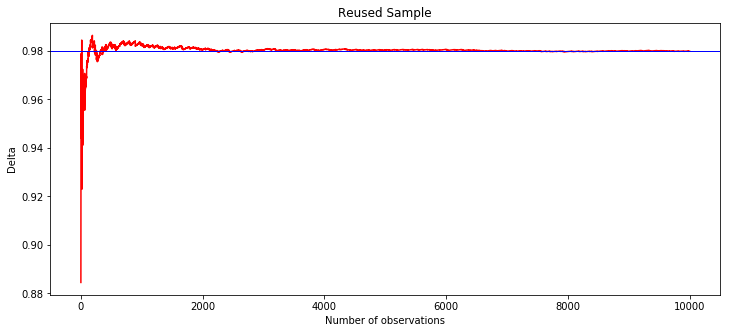

In [12]:
#Reused Sample
NX = np.linspace(1, 10000,10000,dtype=np.int)
plt.figure(figsize=(12,5))

plt.title('Reused Sample')
plt.xlabel('Number of observations')
plt.ylabel('Delta')

plt.plot(np.cumsum(Dtreuseds1a)/np.arange(1,10001), color = 'r')
plt.axhline(TrueDelta, color='blue',linewidth=1)
plt.show()

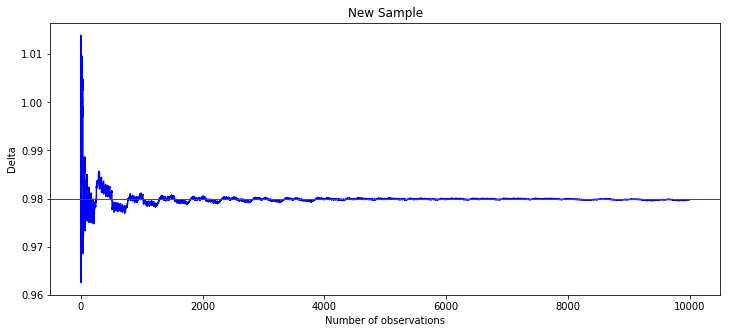

In [13]:
#New Sample
NX = np.linspace(1, 10000,10000,dtype=np.int)
plt.figure(figsize=(12,5));

plt.title('New Sample')
plt.xlabel('Number of observations')
plt.ylabel('Delta')

plt.plot(np.cumsum(Dtnews2)/np.arange(1,10001), color = 'b')
plt.axhline(TrueDelta, color='red',linewidth=1)
plt.show()

### Question 8
The FDM scheme to calculate ∆ is useful only when the payoff function is smooth (as in European call/put case). When it’s not the case, for example a [binary option]( http://www.wilmottwiki.com/wiki/index.php?title=Binary_option), then FDM method converges very slow to the exact value. Verify that in the case of a binary call option $ϕ(S_T) = \mathbb{1}_{S_T≥K}$ the estimation error is very large even with $n = 10^6$ . The estimation error is calculated as

\begin{equation}
\text{err  in  percentage} = 100 × \Big| \frac{MC value - exact value}{exact value} \Big|
\end{equation}


In [25]:
# Input
S0 = 100 # Stock Price S0
K0 = 100 # Strike Price K0
r0 = 0.2 # Risk free Rate 
sigma0 = 0.1 # Volatility 
T0 = 1 # Time to Maturity 
epsilon0 = 0.001 # Epsilon 
Nn = 10**6

#generate data sample
BiND1 = np.random.normal(0,1,Nn)
BiND2 = np.random.normal(0,1,Nn)

BiStockPrice = lambda t: (S0) * np.exp((r0 - 0.5 * (sigma0**2))*T0 + sigma0*np.sqrt(T0)*t)
BiStockPricep = lambda t: (S0+epsilon0) * np.exp((r0 - 0.5 * (sigma0**2))*T0 + sigma0*np.sqrt(T0)*t)
BiStockPricem = lambda t: (S0-epsilon0) * np.exp((r0 - 0.5 * (sigma0**2))*T0 + sigma0*np.sqrt(T0)*t)

BiPayOff = lambda t: np.where(t>K0,1,0) 
BiOptionPrice = lambda t: np.exp(-r0*T0)*np.mean(t)

Bis1utx = BiOptionPrice(BiPayOff(BiStockPrice(BiND1)))
Bis2utxpe = BiOptionPrice(BiPayOff(BiStockPricep(BiND1)))
Bis2utxme = BiOptionPrice(BiPayOff(BiStockPricem(BiND2)))

BiDtnews2 = (Bis2utxpe-Bis2utxme)/(2*epsilon0) #reused

dp = (np.log(S0/K0) + (r0 + 0.5*(sigma0**2))*T0)/(sigma0*np.sqrt(T0))
BiTrueDelta = stats.norm.cdf(dp)

In [26]:
# Error Calculation
errip = 100*abs(((BiDtnews2) - BiTrueDelta ) / BiTrueDelta)
print('Error in percentage',errip,'%')

Error in percentage 96.99185832568254 %


### Question 9
In such cases, we are able to use an advanced method, the [Malliavin Calculus](https://www.math.nyu.edu/~frizpete/finance/fournie1.pdf), to calculate the delta (as well as the other greeks). We admit the following result

\begin{equation}
∆(0,x) = e^{rT}\mathbb{E}^{\mathbb{Q}}[π_∆ · ϕ(S_T) \mid S_0 = x] ,  π_∆ = \frac{W_T}{xσT}
\end{equation}
Compare the estimation error between this case and the previous one.